In [1]:
import numpy as np
import matplotlib.pyplot as plt

from thinkdsp import decorate

In [2]:
np.random.seed(17)

Найпростішим шумом для генерації є некорельований однорідний шум:

In [3]:
from thinkdsp import UncorrelatedUniformNoise

signal = UncorrelatedUniformNoise()
wave = signal.make_wave(duration=0.5, framerate=11025)
wave.make_audio()

Ось як виглядає його фрагмент:

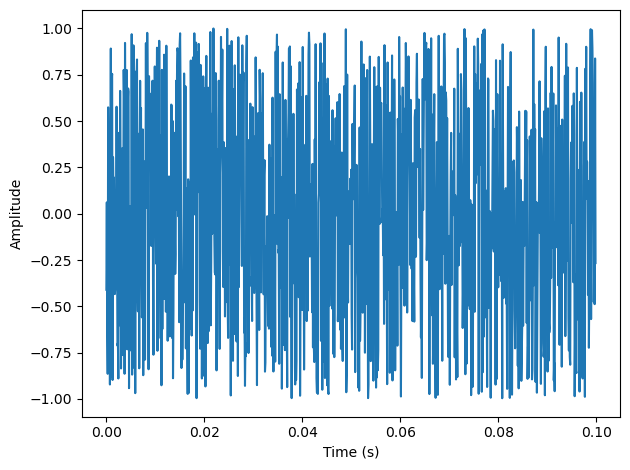

In [4]:
segment = wave.segment(duration=0.1)
segment.plot()
decorate(xlabel='Time (s)',
         ylabel='Amplitude')

А ось спектр:

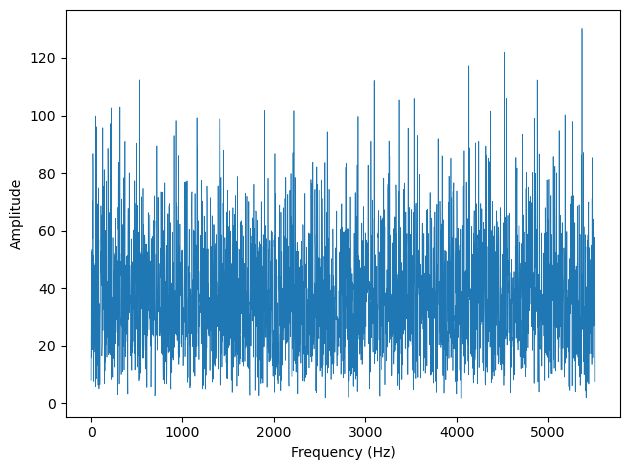

In [5]:
spectrum = wave.make_spectrum()
spectrum.plot(linewidth=0.5)
decorate(xlabel='Frequency (Hz)',
         ylabel='Amplitude')

У контексті шуму більш традиційно дивитися на спектр потужності, який є квадратом амплітуди:

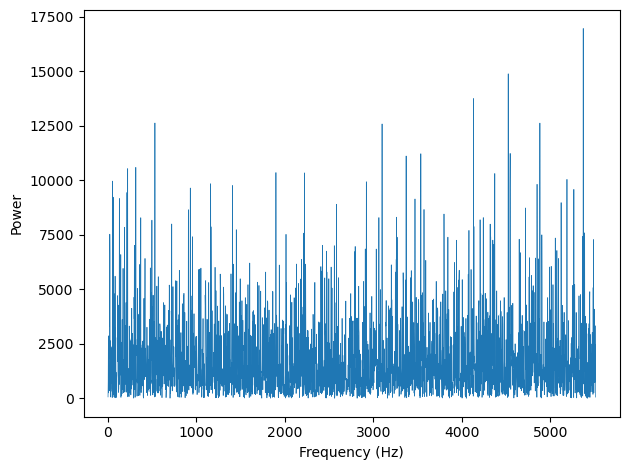

In [6]:
spectrum.plot_power(linewidth=0.5)
decorate(xlabel='Frequency (Hz)',
         ylabel='Power')

Некорельований однорідний шум має однакову потужність на всіх частотах, у середньому, що ми можемо підтвердити, подивившись на нормалізовану кумулятивну суму потужностей, яку я називаю інтегрованим спектром:

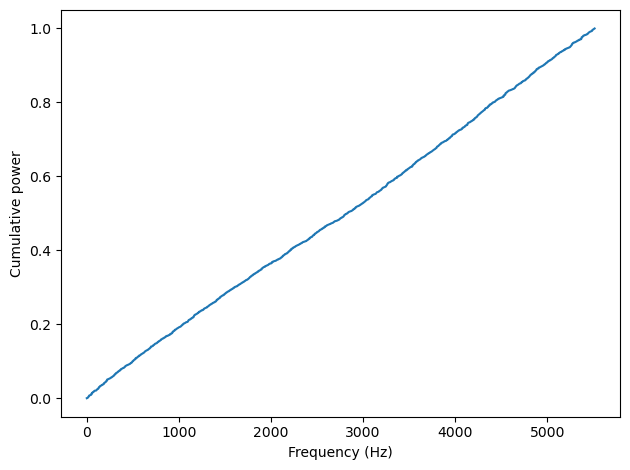

In [7]:
integ = spectrum.make_integrated_spectrum()
integ.plot_power()
decorate(xlabel='Frequency (Hz)',
         ylabel='Cumulative power')

Пряма лінія на цьому малюнку вказує на те, що шум має однакову потужність на всіх частотах у середньому. За аналогією зі світлом шум з такою властивістю називають «білим шумом».

### Броунівський шум

Броунівський шум генерується шляхом додавання послідовності випадкових кроків.

In [8]:
from thinkdsp import BrownianNoise

signal = BrownianNoise()
wave = signal.make_wave(duration=0.5, framerate=11025)
wave.make_audio()

Звук менш яскравий або більш приглушений, ніж білий шум.

Ось як виглядає хвиля:

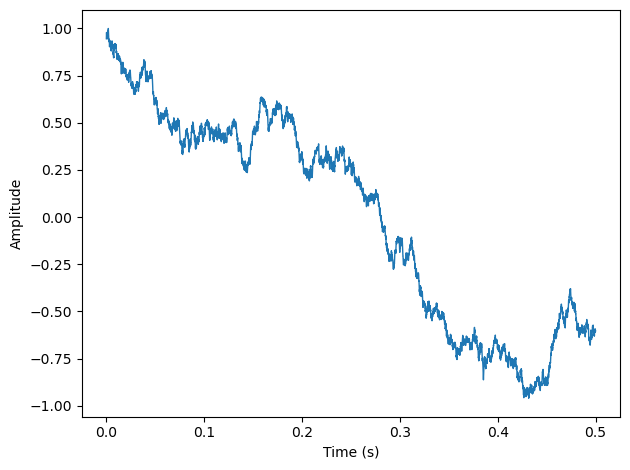

In [9]:
wave.plot(linewidth=1)
decorate(xlabel='Time (s)',
         ylabel='Amplitude')

Ось як виглядає спектр потужності в лінійному масштабі.

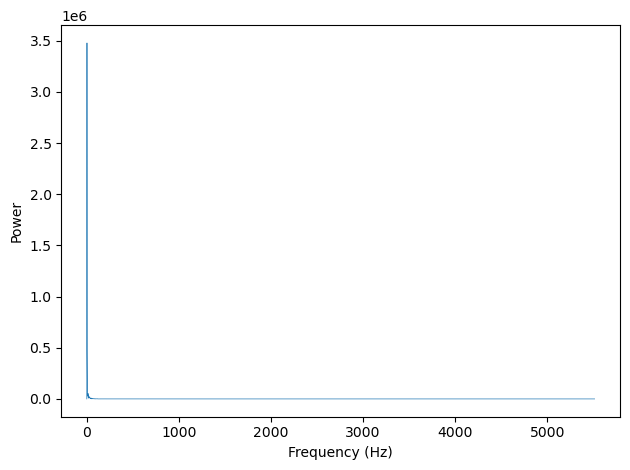

In [10]:
spectrum = wave.make_spectrum()
spectrum.plot_power(linewidth=0.5)
decorate(xlabel='Frequency (Hz)',
         ylabel='Power')

Велика частина енергії знаходиться на низьких частотах, ми навіть не можемо побачити високі частоти.

Ми можемо отримати кращий огляд, побудувавши спектр потужності в логарифмічній шкалі.

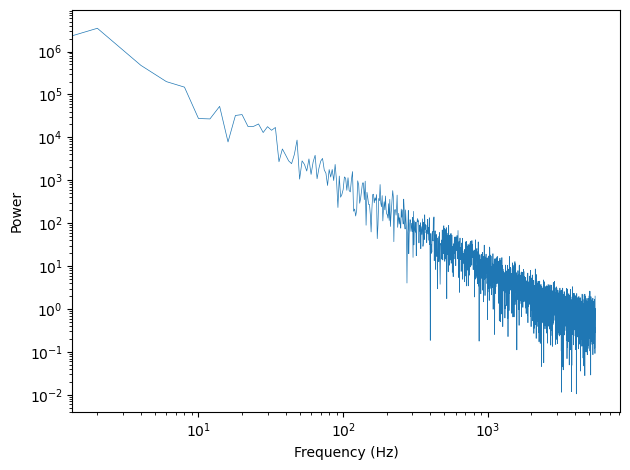

In [11]:
# The f=0 component is very small, so on a log scale
# it's very negative.  If we clobber it before plotting,
# we can see the rest of the spectrum more clearly.
spectrum.hs[0] = 0

spectrum.plot_power(linewidth=0.5)

loglog = dict(xscale='log', yscale='log')
decorate(xlabel='Frequency (Hz)',
         ylabel='Power',
         **loglog)

Тепер зв'язок між потужністю і частотою більш зрозумілий. Нахил цієї лінії становить приблизно -2, що вказує на те, що $P = K / f^2$ для деякої константи $K$.

In [12]:
signal =  BrownianNoise()
wave = signal.make_wave(duration=0.5, framerate=11025)
spectrum = wave.make_spectrum()
result = spectrum.estimate_slope()
result.slope

-1.7846032211221763

Розрахунковий нахил лінії ближче до -1,8, ніж до -2, з причин, які ми побачимо пізніше.

### Рожевий шум

Рожевий шум характеризується параметром $\beta$, зазвичай між 0 і 2. Ви можете почути відмінності нижче.

З $\beta=0$ ми отримуємо білий шум:

In [13]:
from thinkdsp import PinkNoise

signal = PinkNoise(beta=0)
wave = signal.make_wave(duration=0.5)
wave.make_audio()

З $\beta=1$ рожевий шум має співвідношення $P = K / f$, тому його ще називають шумом $1/f$.

In [14]:
signal = PinkNoise(beta=1)
wave = signal.make_wave(duration=0.5)
wave.make_audio()

З $\beta=2$ ми отримуємо броунівський (він же червоний) шум.

In [15]:
signal = PinkNoise(beta=2)
wave = signal.make_wave(duration=0.5)
wave.make_audio()

На наступному малюнку показано спектри потужності білого, рожевого та червоного шумів у логарифмічній шкалі.

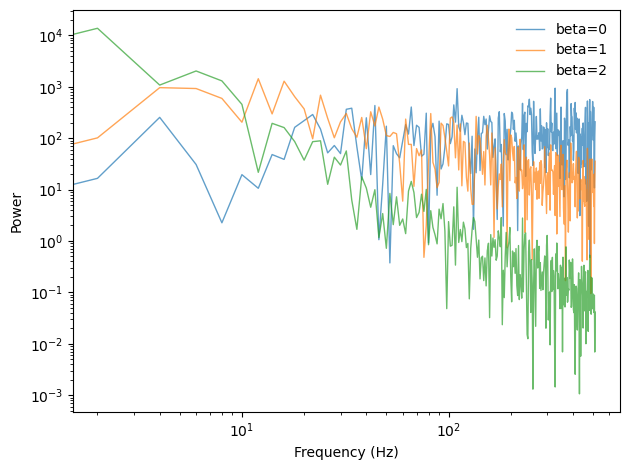

In [16]:
betas = [0, 1, 2]

for beta in betas:
    signal = PinkNoise(beta=beta)
    wave = signal.make_wave(duration=0.5, framerate=1024)
    spectrum = wave.make_spectrum()
    spectrum.hs[0] = 0
    label = f'beta={beta}'
    spectrum.plot_power(linewidth=1, alpha=0.7, label=label)
    
decorate(xlabel='Frequency (Hz)',
         ylabel='Power',
         **loglog)

### Некорельований шум Гауса

Альтернативою шуму UU є некорельований шум Гаусса (шум UG).

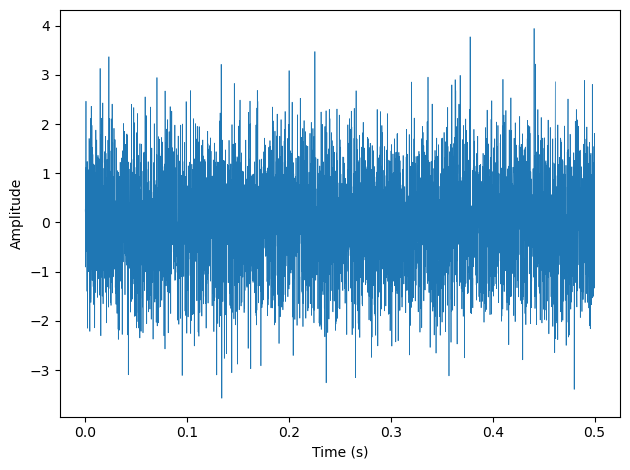

In [17]:
from thinkdsp import UncorrelatedGaussianNoise

signal = UncorrelatedGaussianNoise()
wave = signal.make_wave(duration=0.5, framerate=11025)
wave.plot(linewidth=0.5)
decorate(xlabel='Time (s)',
         ylabel='Amplitude')

Спектр UG шуму також є UG шумом.

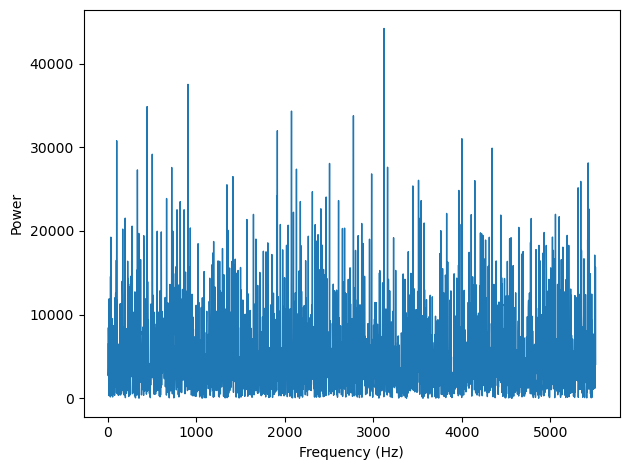

In [18]:
spectrum = wave.make_spectrum()
spectrum.plot_power(linewidth=1)
decorate(xlabel='Frequency (Hz)',
         ylabel='Power')

Ми можемо використати графік нормальної ймовірності, щоб перевірити розподіл спектра потужності.

In [19]:
def normal_prob_plot(sample, fit_color='0.8', **options):
    """Makes a normal probability plot with a fitted line.

    sample: sequence of numbers
    fit_color: color string for the fitted line
    options: passed along to Plot
    """
    n = len(sample)
    xs = np.random.normal(0, 1, n)
    xs.sort()
    
    ys = np.sort(sample)
    
    mean, std = np.mean(sample), np.std(sample)
    fit_ys = mean + std * xs
    plt.plot(xs, fit_ys, color='gray', alpha=0.5, label='model')

    plt.plot(xs, ys, **options)

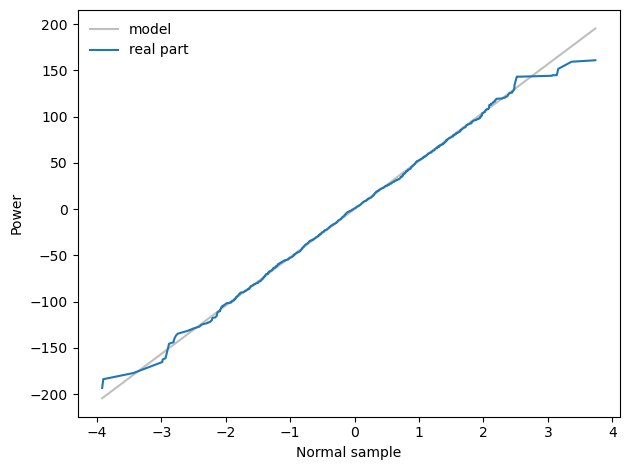

In [20]:
normal_prob_plot(spectrum.real, color='C0', label='real part')
decorate(xlabel='Normal sample',
         ylabel='Power')

Пряма лінія на графіку нормальної ймовірності вказує на те, що розподіл дійсної частини спектра є Гаусовим.

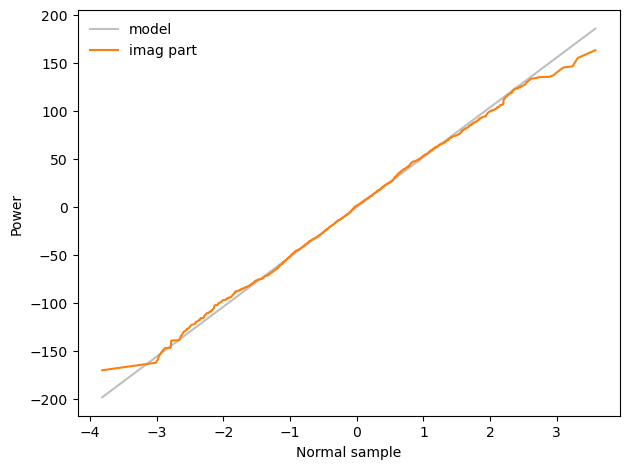

In [21]:
normal_prob_plot(spectrum.imag, color='C1', label='imag part')
decorate(xlabel='Normal sample',
         ylabel='Power')

І так само уявна частина.